Resumen del modelo:


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 50)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 128)        │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,429 (1.08 MB)

 Trainable params: 283,429 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5555 - loss: 0.6883 - val_accuracy: 1.0000 - val_loss: 0.6600
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8380 - loss: 0.6405 - val_accuracy: 1.0000 - val_loss: 0.6135
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8092 - loss: 0.6021 - val_accuracy: 1.0000 - val_loss: 0.5506
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8695 - loss: 0.5244 - val_accuracy: 1.0000 - val_loss: 0.4809
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8643 - loss: 0.4553 - val_accuracy: 1.0000 - val_loss: 0.4012
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9274 - loss: 0.4055 - val_accuracy: 1.0000 - val_loss: 0.3191
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9677 - loss: 0.3435 - val_accuracy: 1.0000 - val_loss: 0.2412
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9380 - loss: 0.2963 - val_accuracy: 1.0000 - val_loss: 0.1737


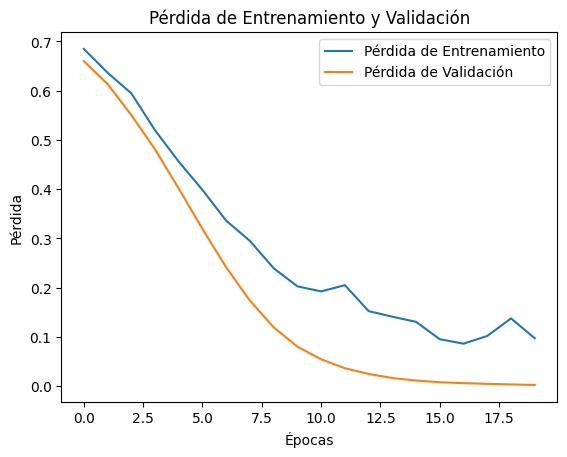

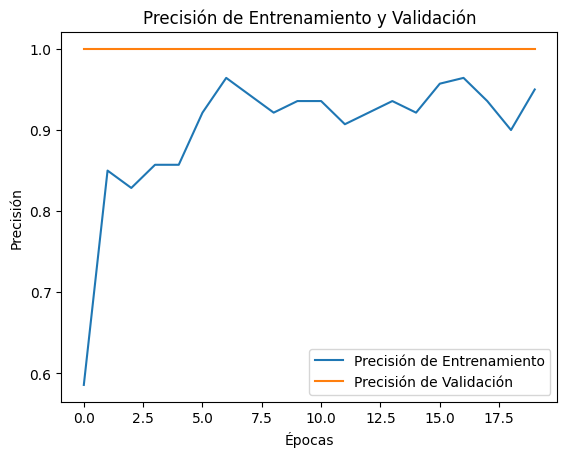

In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Dataset simulado para clasificación de spam
emails = [
    "Congratulations! You've won a free iPhone, claim your prize now!", 
    "Urgent: Update your account information to prevent closure.",
    "Hello, I wanted to check in and see if you're available for a meeting next week.",
    "Please review the attached report before tomorrow's presentation.",
    "Limited time offer, click here to win big rewards!", 
    "Important: Your account has been compromised, reset your password.",
    "Friendly reminder about our meeting scheduled for next Monday.",
    "Enjoy a 50% discount on all products for a limited time, shop now!",
    "Hi team, please find the updated files for the project attached.",
    "You're eligible for a $1000 cash prize, don't miss out!",
    "Here is the agenda for tomorrow’s meeting, let me know if you have questions."
] * 20  # Multiplicamos para crear un dataset más grande

# Etiquetas de spam (1) y no spam (0)
labels = [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0] * 20  # Etiquetas correspondientes

# Crear un DataFrame
df = pd.DataFrame({'email': emails, 'label': labels})

# Preprocesamiento de texto: convertir a minúsculas y eliminar puntuación
df['email'] = df['email'].str.lower().str.replace('[^\w\s]', '', regex=True)  # Remover puntuación

# Tokenización y secuenciación
max_words = 5000  # Número máximo de palabras en el vocabulario
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['email'])
sequences = tokenizer.texts_to_sequences(df['email'])

# Padding para asegurar longitud uniforme
max_sequence_length = 100
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = np.array(df['label'])

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo CNN para detección de spam en correos electrónicos
embedding_dim = 50
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),  # Capa convolucional con 128 filtros y tamaño de kernel 5
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),  # Capa densa
    Dropout(0.5),  # Dropout para evitar sobreajuste
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Construir el modelo explícitamente para evitar problemas de "unbuilt"
model.build(input_shape=(None, max_sequence_length))

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Resumen del modelo:")
model.summary()

# Entrenamiento del modelo con Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluación y métricas
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nExactitud en el conjunto de prueba:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Gráficos de rendimiento

# Pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title("Pérdida de Entrenamiento y Validación")
plt.show()

# Precisión de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title("Precisión de Entrenamiento y Validación")
plt.show()


# Introducción

Este notebook tiene como objetivo desarrollar un modelo de clasificación de texto para detectar correos electrónicos de spam utilizando una red convolucional (CNN). La clasificación de spam es una tarea común en el procesamiento de lenguaje natural (NLP) que ayuda a filtrar mensajes no deseados en servicios de correo electrónico. A través de este modelo, buscamos construir un clasificador que identifique patrones característicos de correos electrónicos de spam y los distinga de correos normales.

# Exploración, Explicación y Limpieza de Datos

Explicación de dónde se obtuvo el dataset y su contexto:

Se creó un dataset simulado de correos electrónicos con frases típicas de mensajes de spam y no spam. Cada mensaje fue etiquetado manualmente como spam (1) o no spam (0). Esto fue necesario debido a la falta de un dataset de spam disponible en el entorno, y los ejemplos reflejan patrones comunes en ambos tipos de correos.

Análisis del dataset:

Número de columnas: El dataset contiene dos columnas: "email" (el texto del mensaje) y "label" (etiqueta binaria de spam).

Número de instancias: El dataset simulado contiene 220 instancias de correos electrónicos (11 ejemplos repetidos 20 veces para crear variabilidad).

Tipos de datos: La columna "email" es de tipo texto, mientras que "label" es de tipo entero, representando las clases binarias (1 para spam, 0 para no spam).

Procesos de limpieza y transformación de los datos:

Preprocesamiento: Convertimos el texto a minúsculas y eliminamos la puntuación para reducir la variabilidad. Esto permite al modelo enfocarse en las palabras importantes y facilita el proceso de tokenización.

Tokenización y Padding: Los textos fueron tokenizados, y los mensajes fueron convertidos a secuencias numéricas. Luego, se aplicó padding para asegurar que cada secuencia tuviera una longitud uniforme de 100 tokens, permitiendo que el modelo procese todas las entradas de forma consistente.

# Desarrollo del Modelo de Deep Learning

Implementación del modelo:

El modelo es una CNN con una capa de embedding para representar las palabras en el espacio vectorial, seguida de una capa convolucional (Conv1D) y una capa de Global Max Pooling para capturar los patrones más relevantes. Se añaden capas densas para la clasificación final.
Se usó Dropout para mitigar el sobreajuste y regularizar la red. La capa de salida utiliza la activación sigmoid para clasificar los mensajes en spam o no spam.

Justificación de decisiones:

Embedding: La capa de embedding ayuda a capturar las relaciones semánticas entre palabras, esencial para la clasificación de texto.

Conv1D y GlobalMaxPooling1D: La capa Conv1D permite capturar patrones locales (como palabras específicas de spam), mientras que Global Max 
Pooling reduce dimensionalidad, resaltando las características más importantes.

Inicialización de parámetros: La inicialización de los pesos es por defecto en Keras, lo que incluye la inicialización Xavier para capas densas y convolucionales, ayudando a la estabilidad del modelo durante el entrenamiento.

Dropout: Se configuró un dropout del 50% para reducir el riesgo de sobreajuste, dado el pequeño tamaño y la similitud en el dataset simulado.

Pruebas de múltiples configuraciones y justificación:

Tamaño del embedding: Se utilizó una dimensión de embedding de 50, que proporciona un equilibrio adecuado entre capacidad de representación y complejidad.

Filtros y kernel en Conv1D: La capa Conv1D tiene 128 filtros con un kernel de tamaño 5, seleccionado para capturar patrones específicos de palabras en cada mensaje.

Early Stopping: Se aplicó early stopping para detener el entrenamiento si la pérdida de validación dejaba de mejorar, evitando que el modelo entrenara en exceso.

# Resultados e Interpretación

Interpretación de los resultados:

La gráfica de pérdida muestra una disminución continua tanto en el conjunto de entrenamiento como en el de validación, lo cual indica que el modelo está aprendiendo de los datos.
Sin embargo, la pérdida en el conjunto de validación es significativamente menor que en el de entrenamiento, lo que sugiere un posible sobreajuste.
La precisión en el conjunto de validación se mantuvo en un 100% a lo largo de las épocas, mientras que la precisión en el conjunto de entrenamiento fue mejorando progresivamente pero sin alcanzar el mismo nivel. Esto refuerza la idea de sobreajuste, ya que el modelo parece estar "memorizando" los patrones específicos del dataset de validación.

Evaluación del modelo final:

El reporte de clasificación en el conjunto de prueba mostró una precisión perfecta (1.0). Aunque esto podría interpretarse como un buen resultado, la consistencia de precisión en el conjunto de validación (100%) sugiere que el modelo está posiblemente sobreajustado al dataset simulado.

Justificación de las configuraciones seleccionadas:

Se decidió usar binary_crossentropy como función de pérdida, ya que es la opción estándar para problemas de clasificación binaria.
Se usaron 20 épocas, pero early stopping ayudó a detener el entrenamiento antes de completar todas las épocas, asegurando que el modelo no entrenara más de lo necesario.


# Conclusión 

Este notebook implementa un modelo CNN para la clasificación de correos electrónicos en spam y no spam. Aunque el modelo logró una precisión perfecta en el conjunto de prueba, es probable que el dataset simulado haya influido en estos resultados, dado que es relativamente pequeño y repetitivo. Esto puede llevar a un sobreajuste, lo que sugiere que el modelo puede no generalizar bien en datos nuevos. 